In [25]:
# Copyright 2020 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning

# Laboratory 2: Computer Vision

# Part 1: MNIST Digit Classification


In [2]:
# Import Tensorflow 2.0
#%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 1s 0us/step


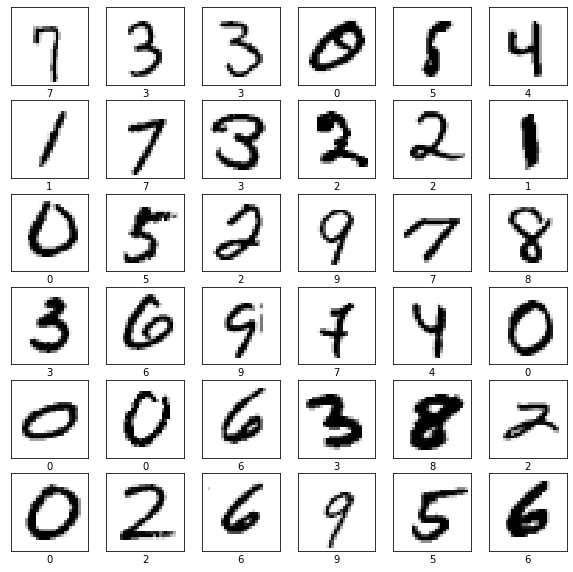

In [7]:
#Training set contains 28x28 grayscale images of handwritten digits. 

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

### Fully connected neural network architecture

In [6]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        # First define a Flatten layer
        #Flatten the layer to be fed into the model
        #transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
        tf.keras.layers.Flatten(), 
        
        #The first `Dense` layer has 128 nodes (or neurons)
        tf.keras.layers.Dense(128, activation= 'relu'),
        
        #The first `Dense` layer has 10 nodes (or neurons) for 10 classes 0-9
        #Each node contains a probability score, all 10 nodes adding up to 1
        tf.keras.layers.Dense(10, activation='softmax') 
    ])
    return fc_model

model = build_fc_model()

### Compile the model

In [8]:
#Loss function — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
#Optimizer — This defines how the model is updated based on the data it sees and its loss function.
#Metrics — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy', #Used for category classification
              metrics=['accuracy'])

#Experiment with both the choice of optimizer and learning rate to get better results

### Train the model

In [9]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3714 - accuracy: 0.8961
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1958 - accuracy: 0.9439
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1467 - accuracy: 0.9580
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1192 - accuracy: 0.9660
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1003 - accuracy: 0.9716


### Evaluate accuracy on the test dataset

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0987 - accuracy: 0.9695
Test accuracy: 0.9695


In [11]:
# Overfitting exists as our accuracy in testing dataset is lower than training dataset

## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

In [12]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        #Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu'),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  115328    
_________________________________________________________________
dense_5 (Dense)              multiple                 

### Train and test the CNN model

In [13]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='sparse_categorical_crossentropy', #Used for category classification
              metrics=['accuracy']) # TODO

### Train the model

In [14]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 261us/sample - loss: 0.1751 - accuracy: 0.9492
Epoch 2/5
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0528 - accuracy: 0.9839
Epoch 3/5
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0368 - accuracy: 0.9882
Epoch 4/5
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0272 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0206 - accuracy: 0.9938


### Evaluate accuracy on the test dataset

In [16]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0321 - accuracy: 0.9884
Test accuracy: 0.9884


### Make predictions with the CNN model

In [17]:
predictions = cnn_model.predict(test_images)

In [18]:
predictions[0]

array([3.6479080e-09, 1.6185417e-10, 1.1330974e-07, 2.9964409e-07,
       3.7876483e-10, 7.3709694e-10, 3.7840029e-17, 9.9999952e-01,
       4.6150217e-09, 4.6643777e-08], dtype=float32)

In [19]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 

print(prediction)

7


Label of this digit is: 7


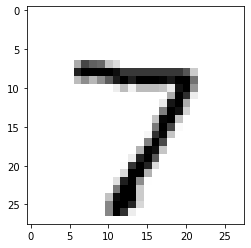

In [20]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

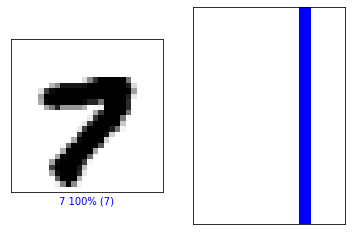

In [21]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

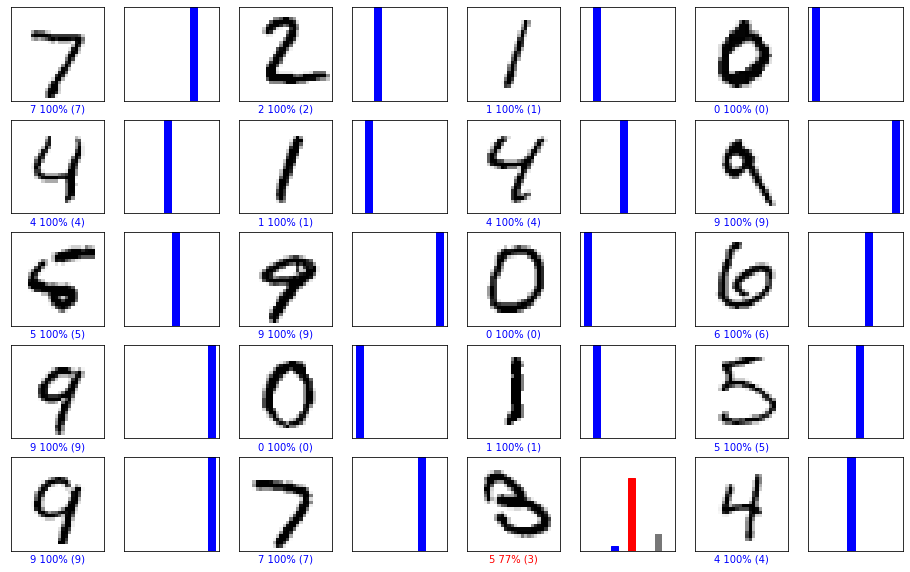

In [22]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)


## 1.4 Training the model 2.0 using tf.GradientTape.gradient

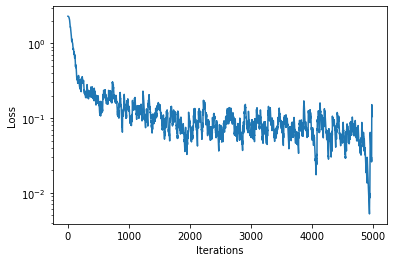

100%|██████████| 5000/5000 [00:56<00:00, 88.09it/s] 


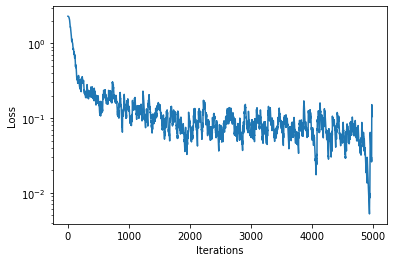

In [24]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        #Feed the images into the model and obtain the predictions'''
        logits = cnn_model(images)

        #Compute the categorical cross entropy loss
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

    loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
    plotter.plot(loss_history.get())

    # Backpropagation
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
